# Burger's equation

In [7]:
import matplotlib.pyplot      as plt
import numpy                  as np

In [ ]:
# Space
L = 10.0     
nx = 101    
dx = L/(nx-1)   
x = np.linspace(0, L, nx)

# Define the initial condition
u_initial = 10*np.exp(-(x-5)**2)

# Time
cf = 0.5
t_final = 0.5
dt = cf * dx 
t_final_values = [t_final/10,t_final/2,t_final]

u_current = u_initial

In [ ]:
solutions_nc = []
solutions_c = []

In [10]:
def evolve_conservative() :
    global u
    u_next = np.zeros(nx)
    for j in range (len(u)):
        u_next[j] = u[j] -  dt / dx * (0.5* u[j%len(u)]**2 -  0.5*u[(j-1)%len(u)]**2)
    u = u_next
    return u

def evolve_noncons() :
    global u
    u_next = np.zeros(nx)
    for j in range (len(u)):
        u_next[j] = u[j] -  dt / dx * u[j%len(u)]*( u[j%len(u)] -  u[(j-1)%len(u)])
    u = u_next
    return u

# Conservative

In [11]:
u_current = u_initial
t = 0

while t <= t_final :
    
    if any(abs(t - val) < dt for val in t_final_values):
        # Append the current solution to the solutions list
        solutions_nc.append(u_current.copy())
        
    u_next =  u_current - dt/(dx)*(0.5*u_current**2 - 0.5*np.roll(u_current, 1)**2)     
    u_current = u_next.copy()
    
    t = t + dt

u_conservative = u_current

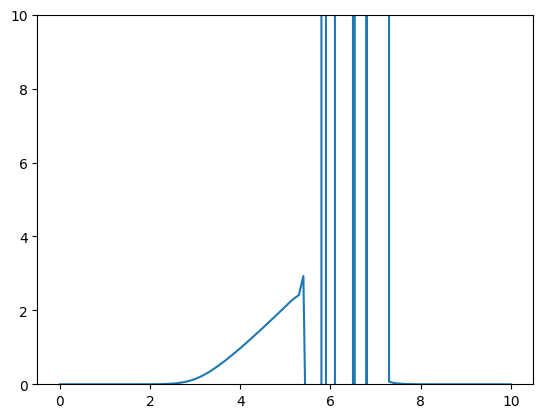

In [12]:
plt.ylim(0,10)
plt.plot(x,u_conservative)
plt.show()

# Non conservative

In [13]:
u_current = u_initial
t = 0

while t <= t_final :
    
    if any(abs(t - val) < dt for val in t_final_values):
        # Append the current solution to the solutions list
        solutions_nc.append(u_current.copy())
        
    u_next =  u_current - u_current*dt/(dx)*(u_current - np.roll(u_current, 1))
    u_current = u_next.copy()
    
    t = t + dt

u_non_conservative = u_current

In [ ]:
#plt.ylim(0,10)
plt.plot(x,u_non_conservative)
plt.show()

In [ ]:
plt.plot(x, u_initial, label='Initial')
plt.plot(x,u_non_conservative,label='Conservative')
plt.plot(x,u_conservative,label='Non Conservative')
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
plt.show()

# Plots

In [ ]:
# Plot the final solution
plt.title('Upwind flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_c[0], label='Time=' + str(t_final_values[0]))
plt.plot(x, solutions_c[1], label='Time=' + str(t_final_values[1]))
plt.plot(x, solutions_c[2], label='Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger FC.png')
plt.show()

In [ ]:
# Plot the final solution
plt.title('Upwind non flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_nc[0], label='Time=' + str(t_final_values[0]))
plt.plot(x, solutions_nc[1], label='Time=' + str(t_final_values[1]))
plt.plot(x, solutions_nc[2], label='Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger FNC.png')
plt.show()

In [ ]:
# Plot the final solution
plt.title('Upwind flux-conservative Scheme Burger equation')
plt.plot(x, u_initial, label='Initial')

plt.plot(x, solutions_c[0], label='C Time=' + str(t_final_values[0]))
plt.plot(x, solutions_c[1], label='C Time=' + str(t_final_values[1]))
plt.plot(x, solutions_c[2], label='C Time=' + str(t_final_values[2]))
plt.plot(x, solutions_nc[0], label='NC Time=' + str(t_final_values[0]))
plt.plot(x, solutions_nc[1], label='NC Time=' + str(t_final_values[1]))
plt.plot(x, solutions_nc[2], label='NC Time=' + str(t_final_values[2]))

#plt.ylim(0, 1.1)
plt.xlabel('x')
plt.ylabel('u')
plt.legend()
#plt.savefig('Burger.png')
plt.show()